In [56]:
#Import Libraries/Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Shape of Dataset
df.shape

(150, 6)

### 150 Rows and 6 Columns

In [4]:
# Dataset Columns
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
#Dataset Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#Dataset Statistical Summary
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
#Checking Null Values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
# To display no. of samples on each class.
df['Species'].value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<AxesSubplot:ylabel='Species'>

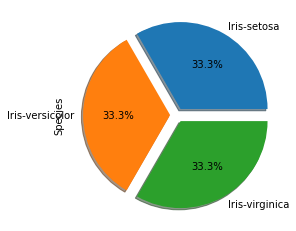

In [9]:
#Pie plot to show the overall types of Iris classifications
df['Species'].value_counts().plot(kind = 'pie',  autopct = '%1.1f%%', shadow = True, explode = [0.08,0.08,0.08])


In [10]:
#correlation matrix
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


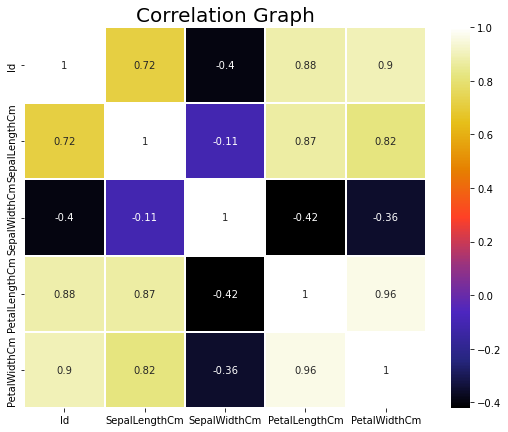

In [11]:
#Correlation Heatmap
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),cmap='CMRmap',annot=True,linewidths=2)
plt.title("Correlation Graph",size=20)
plt.show()

In [12]:
#Label encoding for categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [14]:
# To display no. of samples on each class.
df['Species'].unique()

array([0, 1, 2])

In [16]:
# Splitting dataset 
features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X = df.loc[:, features].values   #defining the feature matrix
Y = df.Species

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 40,random_state=0)

In [17]:
X_Train.shape


(110, 4)

In [18]:
X_Test.shape

(40, 4)

In [19]:
Y_Train.shape

(110,)

In [20]:
Y_Test.shape

(40,)

In [23]:
# Feature Scaling to bring all the variables in a single scale.
sc = StandardScaler()
X_Train = sc.fit_transform(X_Train)
X_Test = sc.transform(X_Test)

In [24]:
# Importing some metrics for evaluating  models.

from sklearn.metrics import accuracy_score
from sklearn.metrics import  classification_report
from sklearn.metrics import confusion_matrix
print('Executed')

Executed


In [26]:
#Model Creation
#Logistic Regression
log_model= LogisticRegression(random_state = 0)
log_model.fit(X_Train, Y_Train)

# model training
log_model.fit(X_Train, Y_Train)

# Predicting
Y_Pred_Test_log_res=log_model.predict(X_Test)


In [27]:
Y_Pred_Test_log_res

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1])

In [28]:
print("Accuracy:",metrics.accuracy_score(Y_Test, Y_Pred_Test_log_res)*100)

Accuracy: 97.5


In [29]:
print(classification_report(Y_Test, Y_Pred_Test_log_res))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        18
           2       0.90      1.00      0.95         9

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



In [30]:
confusion_matrix(Y_Test,Y_Pred_Test_log_res )

array([[13,  0,  0],
       [ 0, 17,  1],
       [ 0,  0,  9]])

In [32]:
# Importing KNeighborsClassifier from sklearn.neighbors library

knn_model = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='auto')

# Importing KNeighborsClassifier 
knn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# model training
knn_model.fit(X_Train, Y_Train)

# Predicting
Y_Pred_Test_knn=knn_model.predict(X_Test)


In [33]:
# model training
log_model.fit(X_Train, Y_Train)

LogisticRegression(random_state=0)

In [34]:
Y_Pred_Test_knn

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1])

In [35]:
print("Accuracy:",metrics.accuracy_score(Y_Test,Y_Pred_Test_knn)*100)

Accuracy: 97.5


In [36]:
print(classification_report(Y_Test,Y_Pred_Test_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        18
           2       0.90      1.00      0.95         9

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



In [37]:
confusion_matrix(Y_Test, Y_Pred_Test_knn)

array([[13,  0,  0],
       [ 0, 17,  1],
       [ 0,  0,  9]])

In [39]:
# Importing DecisionTreeClassifier from sklearn.tree library and creating an object of it  with hyper parameters criterion,splitter and max_depth.

dec_tree = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=6)

# model training
dec_tree.fit(X_Train, Y_Train)

# Predicting
Y_Pred_Test_dtr=dec_tree.predict(X_Test)

In [40]:
Y_Pred_Test_dtr

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1])

In [41]:
print("Accuracy:",metrics.accuracy_score(Y_Test, Y_Pred_Test_dtr)*100)

Accuracy: 97.5


In [42]:
print(classification_report(Y_Test, Y_Pred_Test_dtr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        18
           2       0.90      1.00      0.95         9

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



In [43]:
confusion_matrix(Y_Test, Y_Pred_Test_dtr)

array([[13,  0,  0],
       [ 0, 17,  1],
       [ 0,  0,  9]])

In [45]:
#Naive Bayes
nav_byes = GaussianNB()

# model training
nav_byes.fit(X_Train, Y_Train)

# Predicting
Y_Pred_Test_nvb=nav_byes.predict(X_Test)

In [46]:
Y_Pred_Test_nvb

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1])

In [47]:
print("Accuracy:",metrics.accuracy_score(Y_Test, Y_Pred_Test_nvb)*100)

Accuracy: 100.0


In [48]:
print(classification_report(Y_Test, Y_Pred_Test_nvb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00         9

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [49]:
confusion_matrix(Y_Test,Y_Pred_Test_nvb )

array([[13,  0,  0],
       [ 0, 18,  0],
       [ 0,  0,  9]])

In [51]:
#Random Forest Classification

Ran_for = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')

# model training
Ran_for.fit(X_Train, Y_Train)

# Predicting
Y_Pred_Test_rf=Ran_for.predict(X_Test)

In [52]:
Y_Pred_Test_rf

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1])

In [53]:
print("Accuracy:",metrics.accuracy_score(Y_Test,Y_Pred_Test_rf)*100)

Accuracy: 95.0


In [54]:
print(classification_report(Y_Test, Y_Pred_Test_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.94      0.94        18
           2       0.89      0.89      0.89         9

    accuracy                           0.95        40
   macro avg       0.94      0.94      0.94        40
weighted avg       0.95      0.95      0.95        40



In [55]:
confusion_matrix(Y_Test,Y_Pred_Test_rf)

array([[13,  0,  0],
       [ 0, 17,  1],
       [ 0,  1,  8]])

In [57]:
# Importing SVC from sklearn.svm library


svm_model=SVC(C=500, kernel='rbf')

# model training
svm_model.fit(X_Train, Y_Train)

# Predicting
Y_Pred_Test_svm=svm_model.predict(X_Test)


In [58]:
Y_Pred_Test_svm

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1])

In [59]:
print("Accuracy:",metrics.accuracy_score(Y_Test,Y_Pred_Test_svm)*100)

Accuracy: 97.5


In [60]:
print(classification_report(Y_Test, Y_Pred_Test_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        18
           2       0.90      1.00      0.95         9

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



In [61]:
confusion_matrix(Y_Test,Y_Pred_Test_svm)

array([[13,  0,  0],
       [ 0, 17,  1],
       [ 0,  0,  9]])

In [62]:
#Model Evaluation Results
print("Accuracy of Logistic Regression Model:",metrics.accuracy_score(Y_Test, Y_Pred_Test_log_res)*100)
print("Accuracy of KNN Model:",metrics.accuracy_score(Y_Test,Y_Pred_Test_knn)*100)
print("Accuracy of Decision Tree Model:",metrics.accuracy_score(Y_Test, Y_Pred_Test_dtr)*100)
print("Accuracy of Naive Bayes Model:",metrics.accuracy_score(Y_Test, Y_Pred_Test_nvb)*100)
print("Accuracy of Random Forest Classification Model:",metrics.accuracy_score(Y_Test,Y_Pred_Test_rf)*100)
print("Accuracy of SVM Model:",metrics.accuracy_score(Y_Test,Y_Pred_Test_svm)*100)

Accuracy of Logistic Regression Model: 97.5
Accuracy of KNN Model: 97.5
Accuracy of Decision Tree Model: 97.5
Accuracy of Naive Bayes Model: 100.0
Accuracy of Random Forest Classification Model: 95.0
Accuracy of SVM Model: 97.5


# Conclusion

#### Our dataset was not very large and consisted of only 150 rows, with all the 3 species uniformly distributed.
#### PetalWidthCm was highly correlated with PetalLengthCm
#### PetalLengthCm was highly correlated with PetalWidthCm
#### Tried with 6 different machine learning Classification models on the Iris Test data set to classify the flower into it's three species:
#### a) Iris Setosa
#### b) Iris Versicolour
#### c) Iris Virginica,
#### based on the length and width of the flower's Petals and Sepals.​
#### We got very high accuracy score for all the models, and even the accuracy score of 100 for KNN and SVM with Linear Kernel models with some hyper parameter tuning maybe due to small size of dataset.List item